In [17]:
import cv2
import numpy as np

In [18]:
def detect_pieces(frame):
    """
    Detecta piezas en el frame usando contornos
    Retorna: contornos detectados
    """
    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Aplicar filtro Gaussiano para reducir ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Umbralización adaptativa para mejor detección
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Operaciones morfológicas para limpiar la imagen
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # Encontrar contornos
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos por área (eliminar ruido)
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if 100 < area < 10000:  # Ajustar según el tamaño de tus piezas
            filtered_contours.append(contour)

    return filtered_contours, binary

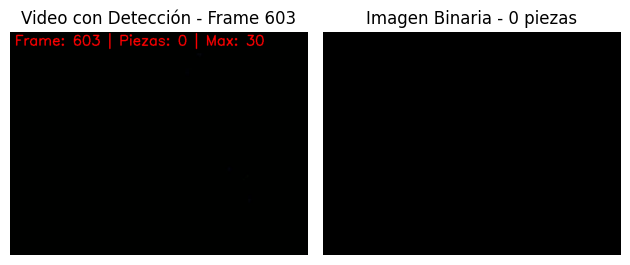

📊 Frame 603: 0 piezas detectadas (Máximo: 30)
\n==================================================
🎯 RESULTADO FINAL
Total de frames procesados: 603
MÁXIMO DE PIEZAS DETECTADAS: 30


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def mostrar_video_con_conteo(video_path='video_1_7.avi'):
    """
    Muestra el video EN TIEMPO REAL mientras cuenta las piezas
    """
    capture = cv2.VideoCapture(video_path)
    
    if not capture.isOpened():
        print("Error: No se pudo abrir el video")
        return
    
    max_piezas = 19
    frame_count = 0
    
    print("🎥 Reproduciendo video con detección en tiempo real...")
    print("Presiona 'Interrupt Kernel' para parar")
    print("=" * 50)
    
    plt.figure(figsize=(12, 8))
    
    try:
        while True:
            ret, frame = capture.read()
            if not ret:
                break
            
            frame_count += 1
            
            # Procesar el frame
            contours, binary = detect_pieces(frame)
            result = frame.copy()
            
            # Dibujar contornos detectados
            piezas_actuales = len(contours)
            for i, contour in enumerate(contours):
                cv2.drawContours(result, [contour], -1, (0, 255, 0), 2)
                # Numerar cada pieza
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    cv2.putText(result, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
            
            # Actualizar máximo
            if piezas_actuales > max_piezas:
                max_piezas = piezas_actuales
            
            # Agregar texto informativo
            info_text = f"Frame: {frame_count} | Piezas: {piezas_actuales} | Max: {max_piezas}"
            cv2.putText(result, info_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Mostrar frame actual
            if frame_count % 3 == 0:  # Mostrar cada 3 frames para velocidad
                clear_output(wait=True)
                
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
                plt.title(f"Video con Detección - Frame {frame_count}")
                plt.axis('off')
                
                plt.subplot(1, 2, 2)
                plt.imshow(binary, cmap='gray')
                plt.title(f"Imagen Binaria - {piezas_actuales} piezas")
                plt.axis('off')
                
                plt.tight_layout()
                plt.show()
                
                print(f"📊 Frame {frame_count}: {piezas_actuales} piezas detectadas (Máximo: {max_piezas})")
                
                time.sleep(0.1)  # Pausa pequeña para ver el video
    
    except KeyboardInterrupt:
        print("\\n⏹️ Video detenido por el usuario")
    
    finally:
        capture.release()
        plt.close('all')
        
        # RESULTADO FINAL
        print("\\n" + "=" * 50)
        print("🎯 RESULTADO FINAL")
        print("=" * 50)
        print(f"Total de frames procesados: {frame_count}")
        print(f"MÁXIMO DE PIEZAS DETECTADAS: {max_piezas}")
        print("=" * 50)
        
        return max_piezas

# EJECUTAR - Mostrar video con conteo
resultado = mostrar_video_con_conteo()